In [1]:
import itertools
import gc
from bib import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  tqdm import tqdm_notebook
sns.set()
sns.set_style("whitegrid")

In [2]:
eps=np.finfo(np.float32).eps
xtrains,ytrains,xvals,yvals,xtest,ytest=split(('CHL 1','THERM 1','SSH','SR','WS','year','5days','longitude','latitude','CC'),
                                               ['CHL '+ str(i) for i in range(2,19)])

In [ ]:
# b=np.linspace(0, 2,50)
# sns.distplot(ytrains[0].values.reshape(-1),bins=b)
# plt.show()
# b=np.linspace(0, 2,50)
# for i in range(17):
#     sns.distplot(ytrains[0].iloc[:,i],bins=b)
#     plt.show()
# b=np.linspace(-4.1, 1,50)
# plt.hist(np.log(ytrains[0].values.reshape(-1)),bins=b)
# plt.show()

In [3]:
cols=xtrains[0].columns.copy()
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)):
        xtrains[0][cols[i]+'.'+cols[j]]=xtrains[0][cols[j]]*xtrains[0][cols[i]]

In [6]:
from boruta import BorutaPy
xtrains[0]['random']=np.random.rand(len(xtrains[0]))
from sklearn.ensemble import ExtraTreesRegressor
rf = ExtraTreesRegressor(n_jobs=-1, max_depth=3)
feat_selector = BorutaPy(rf, n_estimators='auto',max_iter =100, verbose=2, alpha=0.001 ,random_state=1)
feat_selector.fit(xtrains[0].values, ytrains[0].values[:,3])
feat_selector.support_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	33
Tentative: 	15
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	33
Tentative: 	15
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	33
Tentative: 	15
Rejected: 	

array([ True,  True,  True,  True, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False])

In [7]:
cols=xtrains[0].columns.copy()
order=np.argsort(feat_selector.ranking_ )
for v, r in zip(cols[order],np.sort(feat_selector.ranking_ )):
    print(r,v)

1 CHL 1
1 THERM 1.5days
1 THERM 1.longitude
1 THERM 1.latitude
1 SSH.year
1 SSH.5days
1 SSH.longitude
1 SSH.latitude
1 THERM 1.year
1 SR.year
1 SR.longitude
1 SR.latitude
1 SR.CC
1 year.5days
1 5days.longitude
1 5days.latitude
1 5days.CC
1 SR.5days
1 THERM 1.SR
1 SSH.SR
1 CHL 1.CC
1 THERM 1.SSH
1 CHL 1.THERM 1
1 CHL 1.SSH
1 CHL 1.SR
1 5days
1 SR
1 CHL 1.WS
1 CHL 1.year
1 CHL 1.5days
1 CHL 1.longitude
1 CHL 1.latitude
1 THERM 1
1 SSH
2 SSH.WS
2 WS.longitude
2 WS.5days
3 WS.year
5 WS
5 WS.latitude
5 longitude
7 latitude
8 year.latitude
8 THERM 1.WS
10 year.longitude
11 SR.WS
11 SSH.CC
13 longitude.latitude
17 CC
17 WS.CC
17 year.CC
17 latitude.CC
17 THERM 1.CC
17 longitude.CC
17 year
17 random


In [55]:
cols=xtrains[0].columns
rf = ExtraTreesRegressor(n_jobs=-1,n_estimators =100, max_depth=5)
rf.fit(xtrains[0].values, ytrains[0].values[:,0])
df=pd.DataFrame(rf.feature_importances_,index=cols)

for k in range(100):
    for j in range(17):
        rf = ExtraTreesRegressor(n_jobs=-1,n_estimators =150, max_depth=5)
        rf.fit(xtrains[0].values, ytrains[0].values[:,j])
        df[str(j)+'sk'+str(k)]=rf.feature_importances_
means=df.mean(axis=1)
stds=df.std(axis=1)
so=np.argsort(means)
for m,s,c in zip(means[so],stds[so],cols[so]):
    print ('%.4f \t %.4f \t %s'%(m,s,c) )

0.0016 	 0.0027 	 longitude
0.0021 	 0.0032 	 CC
0.0073 	 0.0103 	 latitude
0.0073 	 0.0106 	 year
0.0088 	 0.0088 	 WS
0.0449 	 0.0390 	 SSH
0.1383 	 0.0896 	 SR
0.2116 	 0.2255 	 CHL 1
0.2617 	 0.1288 	 THERM 1
0.3163 	 0.1557 	 5days


0.0025 	 0.0036 	 longitude
0.0028 	 0.0038 	 CC
0.0089 	 0.0080 	 WS
0.0092 	 0.0116 	 latitude
0.0114 	 0.0146 	 year
0.0464 	 0.0386 	 SSH
0.1313 	 0.0816 	 SR
0.2192 	 0.2228 	 CHL 1
0.2562 	 0.1206 	 THERM 1
0.3122 	 0.1534 	 5days

In [3]:
lb = scipy.io.loadmat(dataPath +'VectLB19922008.mat')
labels = [k[0] for k in lb['labels'][0] ]
data=pd.DataFrame(lb['Vect'],columns=labels)


In [4]:
data['time']= data['year']*100+data['5days']


In [7]:
data=data.sort_values('time').groupby('time').mean()
values=data.loc[:,['CHL '+ str(i) for i in range(2,19)]]

In [15]:
auto={}
for d in range(2,19):
    a=[]
    for l in range(500):
        a.append(values['CHL '+str(d)].autocorr(l))
    auto[d]=a
        

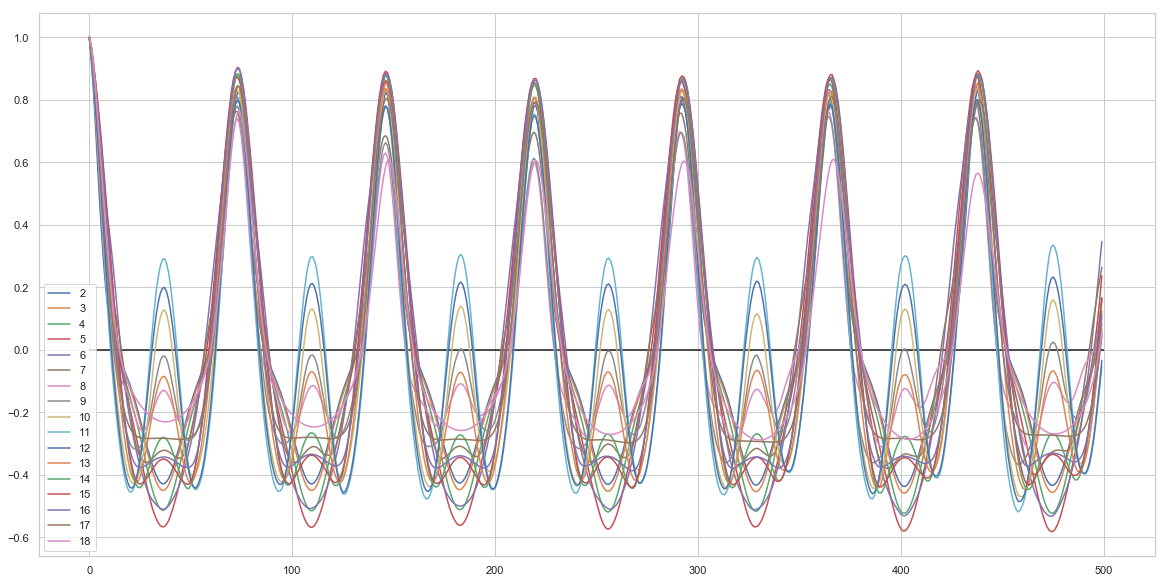

In [16]:
plt.figure(figsize=(20,10))

for k in auto.keys():
    plt.plot(auto[k],label=k)
plt.hlines(0,0,500,'k')
plt.legend()
plt.show()

In [12]:
np.argsort(auto[4])[-150:][::-1]

array([  0,   1,   2, 146,  73, 147,  74,  72, 145, 148,  75,  71,   3,
       144, 149,  76,  70, 143,   4,  77,  69, 142,   5,  78,  68, 141,
         6,  67,  79, 140,  66,  80,   7, 139,  65,  81,   8, 138,  64,
        82,   9, 137,  63,  83, 136,  10,  62,  84, 135,  11,  61,  85,
       134,  12,  60, 133,  86,  13,  59, 132,  87,  14, 131,  58,  88,
        15, 130,  57,  89,  16, 129,  56,  17,  90, 128,  55,  18,  91,
       127,  54,  19,  92, 126,  53,  20,  93, 125,  52,  21,  94, 124,
        51,  95,  22,  50, 123,  96,  23,  49,  97, 122,  24,  48,  98,
       121,  25,  47,  99, 120,  26,  46, 100, 119,  27,  45, 101, 118,
        28,  44, 102, 117,  29,  43, 103, 116,  30,  42, 104, 115,  31,
        41, 105, 114,  32,  40, 106, 113,  33,  39, 107, 112,  34,  38,
       108,  35, 111,  37,  36, 109, 110], dtype=int64)

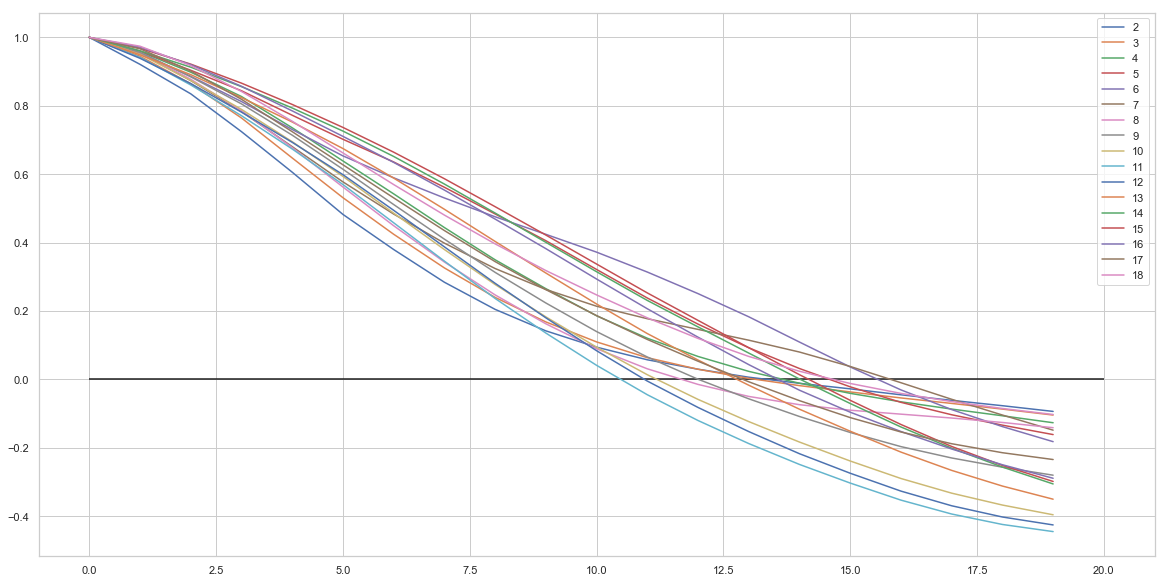

In [14]:
plt.figure(figsize=(20,10))

for k in auto.keys():
    plt.plot(auto[k][:20],label=k)
plt.hlines(0,0,20,'k')
plt.legend()
plt.show()